# Tugas 8 Data Wrangling - Data Preprocessing

* Silakan download dan kerjakan soal berikut dimanapun (laptop pribadi/google colab/etc.)
* Setelah selesai mengerjakan, upload file ini di tempat yang telah disediakan pada platform.
* Beri nama file seperti berikut: {username}-wrangling-8.ipynb
* Contoh: johndoe-ab12-wrangling-8.ipynb
* Tutorial: https://discourse.pacmann.ai/t/pengumuman-seluruh-platform-pacmann-ai/409
* Username dapat dilihat di dalam akun anda.
* Mohon jangan mengubah nama variabel yang telah diberikan.
* Namun anda diperbolehkan untuk menambah variabel apapun.
---

In [ ]:
# Import packages, jika ada yang ingin disesuaikan silakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignore warnings
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning)
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Tugas 8 Wrangling/data_8/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Import data `train.csv` dari data yang diberikan! 

In [ ]:
# Import data, house price
df = pd.read_csv(PATH+'train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Cek kolom nama.
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

Penjelasan lengkap mengenai makna dari tiap variabel dapat dilihat [disini](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

2. Cek jumlah data dan persentase jumlah data NaN dari tiap-tiap kolom

In [ ]:
total_null = df.isna().sum().sort_values(ascending = False) 
percentage_null = ((total_null/df.isna().count()*100).sort_values(ascending = False))

missing_data = pd.concat([total_null, percentage_null], axis = 1, keys = ['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


3. Dari hasil diatas, `PoolQC, MiscFeature, Alley, Fence, FireplaceQu` memiliki lebih dari 40% data yang kosong. Buanglah kolom-kolom tersebut.

In [ ]:
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

In [ ]:
# Cek jumlah kolom setelah dibuang
len(df.columns.values)

76

In [ ]:
total_null = df.isna().sum().sort_values(ascending = False) 
total_null.head(15)

LotFrontage     259
GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
PavedDrive        0
dtype: int64

In [ ]:
missing_columns = ['LotFrontage', 'GarageFinish', 'GarageType', 'GarageCond', 'GarageQual', 'GarageYrBlt', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'MasVnrArea', 'Electrical']
missing_columns

['LotFrontage',
 'GarageFinish',
 'GarageType',
 'GarageCond',
 'GarageQual',
 'GarageYrBlt',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtCond',
 'BsmtQual',
 'MasVnrType',
 'MasVnrArea',
 'Electrical']

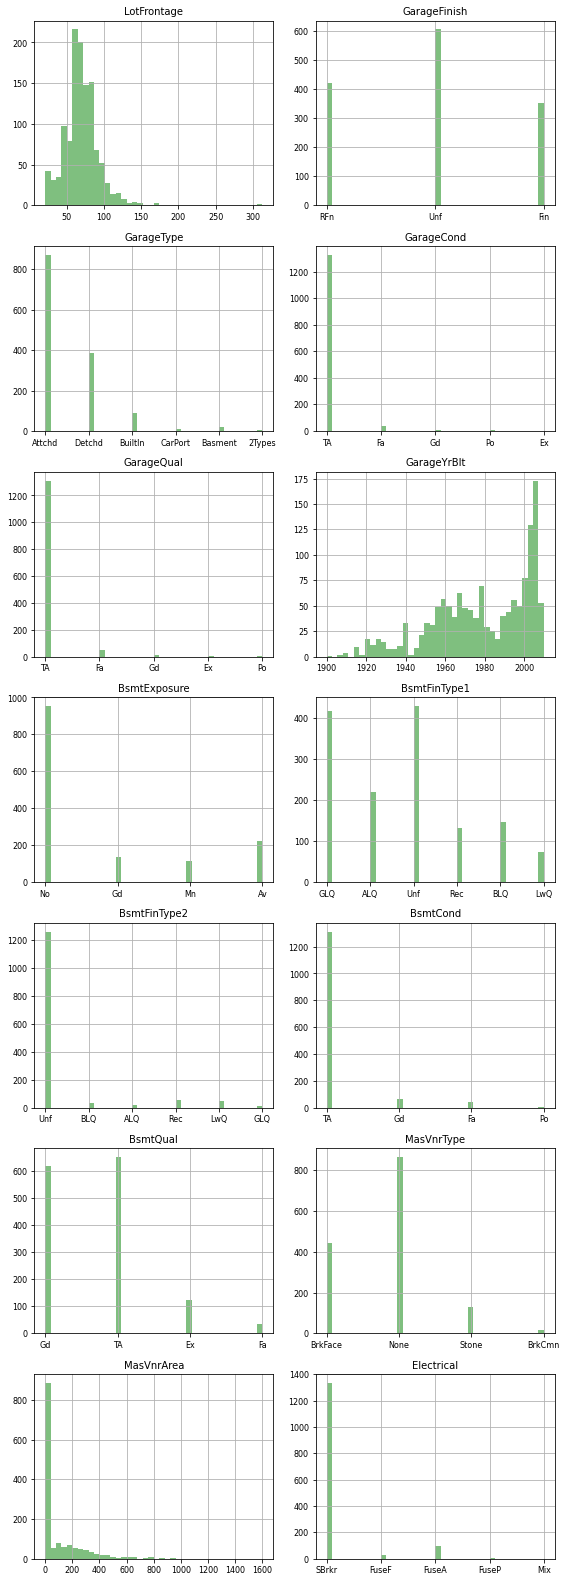

In [ ]:
# Untuk mengetahui distribusi data dari data missing_columns, lakukan visualisasi, JANGAN DIUBAH!
from collections import Counter

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        try:
            df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (8, 24))
        except:
            cnt = Counter(df[var_name])
            cnt.hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (8, 24))
        ax.set_title(var_name, fontsize = 10)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 8)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()

draw_histograms(df, missing_columns, 7, 2)

4.  Lakukanlah imputasi pada data-data tersebut. Dari plot tersebut, kita dapat mengobservasi ada 2 jenis tipe data. Yaitu data numerikal yang kontinu dan data yang merepresentasikan kategori. Untuk simplisitas tugas lakukanlah:

    a. Imputasi median untuk variabel `["LotFrontage","GarageYrBlt","MasVnrArea"]`

In [ ]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

b. Imputasi mode untuk variabel `['GarageFinish', 'GarageType', 'GarageCond', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']`

In [ ]:
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [ ]:
df.isna().sum().sort_values(ascending = False)

Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 76, dtype: int64

5. Di dalam `df`, terdapat banyak tipe data. Namun, secara umum dapat dibedakan menjadi numerik dan non-numerik. Pisahkan kedua tipe data tersebut ke dua dataframe yang berbeda.

In [ ]:
numerical_columns = df._get_numeric_data().columns
numerical_df = df[numerical_columns]

# Set kolom 'Id' sebagai indeks
numerical_df.set_index(['Id'], inplace=True)
numerical_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


b. dataframe kategorikal

In [ ]:
categorical_df = df.drop(numerical_columns, axis=1)
categorical_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


6. Secara Ideal, kita seharusnya mengecek distribusi dari masing-masing fitur pada dataframe numerik dan melakukan proses yang menurut kita sesuai (e.g. Outlier processing, normalisasi, transformasi logaritmik, dll). Namun, sebagai simplifikasi untuk tugas:

a. Lakukanlah normalisasi dengan standard score untuk variabel/fitur `1stFlrSF`

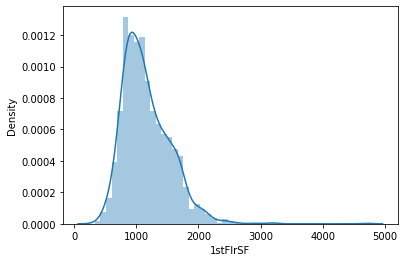

In [ ]:
# Distribusi sebelum
sns.distplot(numerical_df['1stFlrSF'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(numerical_df[['1stFlrSF']])
numerical_df['1stFlrSF_scaled_std'] = scaler.transform(numerical_df[['1stFlrSF']]) # Membuat nama kolom baru yang sudah dilakukan Standard Scaling

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


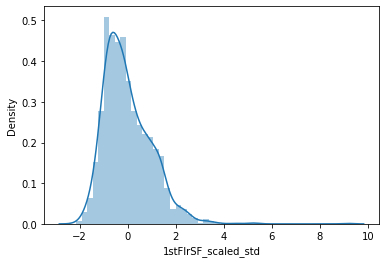

In [ ]:
# Distribusi sesudah
sns.distplot(numerical_df['1stFlrSF_scaled_std'])

b. Lakukanlah transformasi logaritma natural pada variabel `LotArea` 

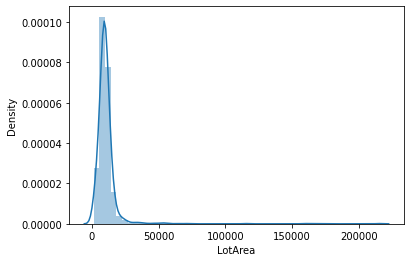

In [ ]:
# Distribusi sebelum
sns.distplot(numerical_df['LotArea'])

In [ ]:
numerical_df['LotArea_log_scale'] = np.log(numerical_df['LotArea'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


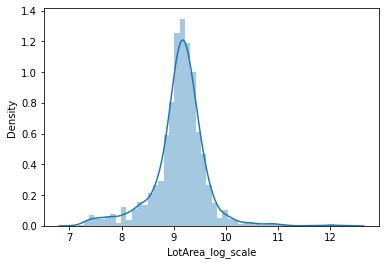

In [ ]:
# Distribusi sesudah
sns.distplot(numerical_df['LotArea_log_scale']) # Membuat kolom baru yang sudah diubah menjadi skala logaritmik

7. Untuk data non-numerik, dapat bermacam-macam. Jika diperhatikan, dalam kasus ini ada 2 kemungkinan tipe data. Yaitu kategorikal dan ordinal (kategori yang memiliki urutan, misal level 1, level 2, level 3). Sehingga, perlu kita cek apakah nilai pada fitur tersebut termasuk kategorikal atau ordinal. Biasanya kita tahu hal ini dari dokumentasi data.

a. Salah satu variabel yang termasuk ordinal adalah variabel `ExterCond` yang memiliki nilai `"Po"=Poor, "Fa"=Fair, dst`. Ubahlah nilai ['Po', 'Fa', 'TA', 'Gd', 'Ex'] dengan nilai [0, 1, 2, 3, 4] dengan urutan `'Po' = 0 `

In [ ]:
ExterCond_dict = {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
categorical_df.replace({'ExterCond':ExterCond_dict}, inplace=True)

In [ ]:
categorical_df.ExterCond.head()

0    2
1    2
2    2
3    2
4    2
Name: ExterCond, dtype: int64

---
### Challenge, Tidak Dinilai
* Setelah nomor 5, kita tidak melakukan transformasi atau normalisasi dengan baik. Lalu, juga masih terdapat tahapan-tahapan lainnya yang sekiranya diperlukan seperti:
- Menghapus/mengganti nilai outlier.
- Transformasi dan Normalisasi untuk tiap-tiap variabel numerik.
- Pengecekan dan transformasi variabel non-numerik, termasuk kategorikal atau ordinal.
- Penggabungan kembali data ke satu dataset.
Jika anda ingin, silakan lakukan langkah-langkah tersebut. Sampai tahap ini, kita masih tidak tahu apakah jawaban dapat benar atau salah (Mungkin juga langkah-langkah yang kami berikan tidak sepenuhnya benar). Silakan cari referensi mengapa hal ini dan itu perlu dilakukan.

### Bonus 2
* Buatlah script pada python untuk kasus ini yang terdiri dari file .py sebagaimana yang dijelaskan pada pertemuan terakhir. Lalu anda dapat meng-upload file-file yang anda buat di gdrive atau github(kalau sudah bisa). Lalu lampirkan link file tersebut disini.

In [ ]:
# Cek semua nama kolom di tabel numerical_df

numerical_df.columns.values

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', '1stFlrSF_scaled_std',
       'LotArea_log_scale'], dtype=object)

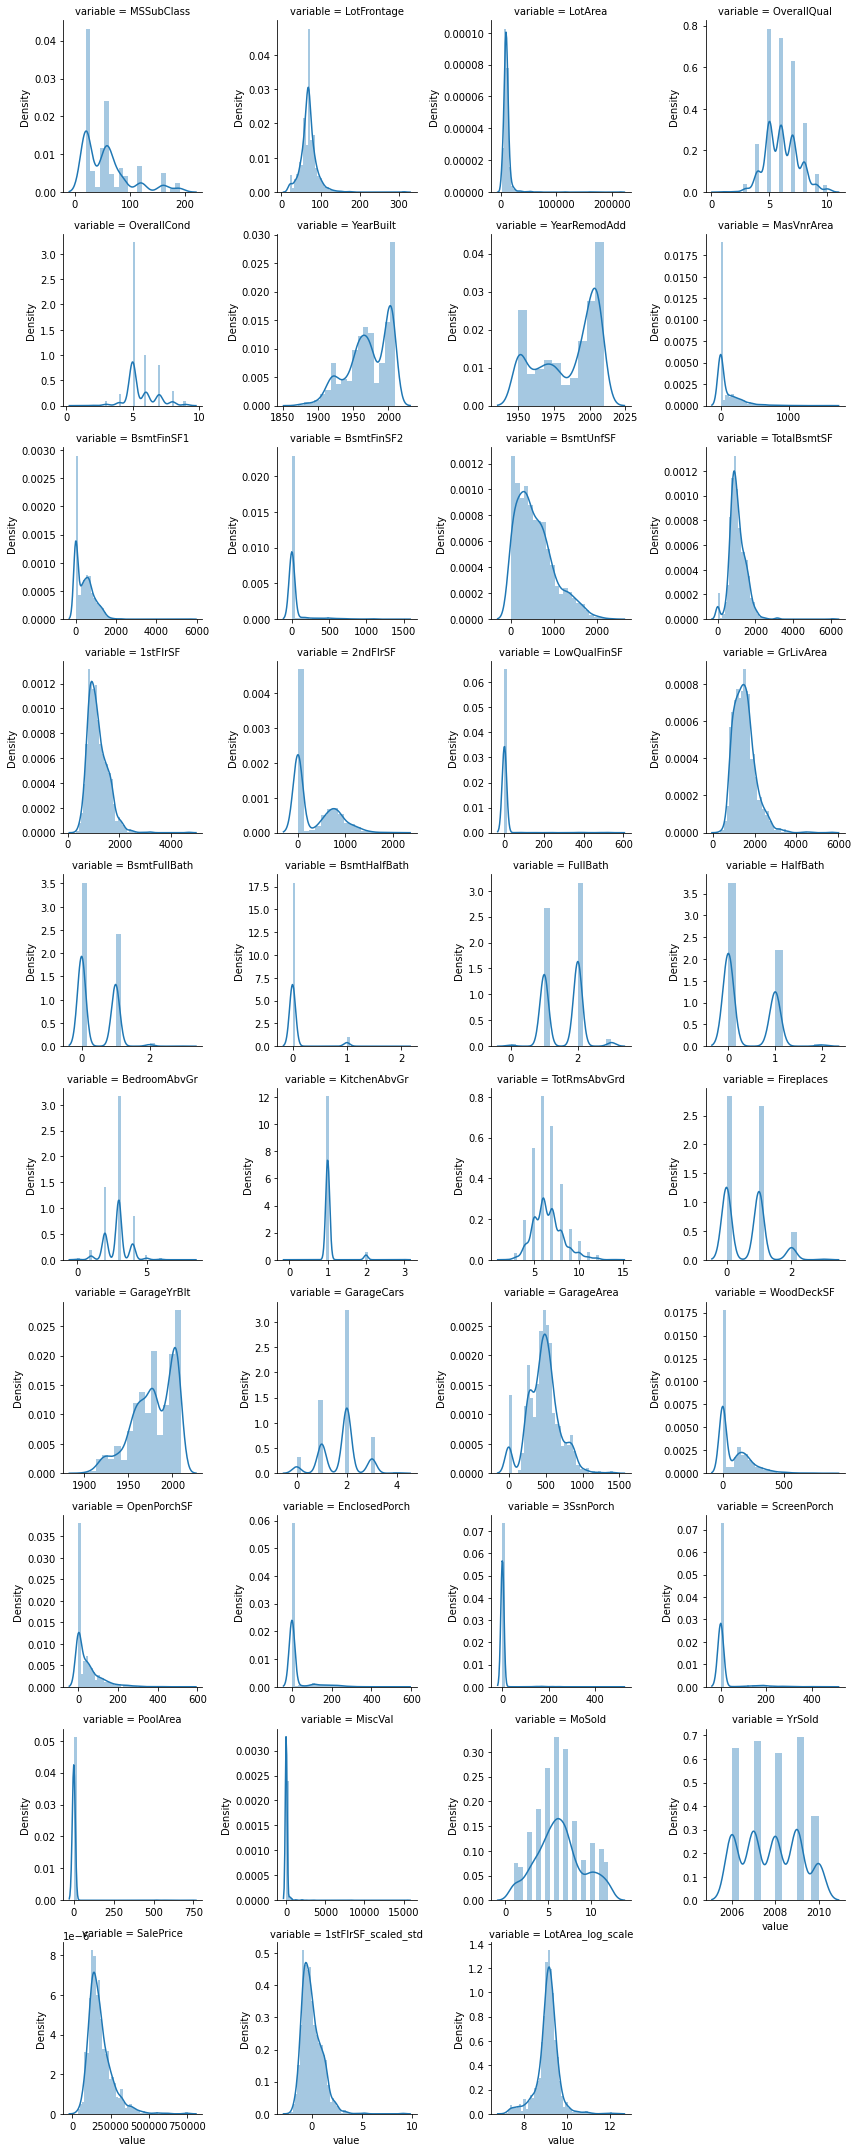

In [ ]:
# Distplot semua kolom numerik, untuk mengetahui distribusi data

f = pd.melt(numerical_df, value_vars=numerical_df.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Dari kolom-kolom yang ada di "numerical_df", sudah dua kolom yang diproses sesuai perintah tugas nomor 6(a) dan 6 (b).

Kolom-kolom sisanya akan saya coba untuk olah berdasarkan plot histogram tersebut, dengan proses yang sesuai. 

Semua kolom yang berhubungan dengan Basement akan dihapus karena kurang penting, kecuali kolom 'TotalBsmtSF' yang menunjukkan data keberadaan Basement di sebuah rumah secara umum


In [ ]:
# Menghapus kolom-kolom yang berhubungan dengan 'Basement' 

numerical_df = numerical_df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','BsmtFullBath','BsmtHalfBath'], axis=1)

In [ ]:
# Mengecek persentase nilai nol pada kolom 'TotalBsmtSF'

jumlah_nol_TotalBsmtSF = numerical_df['TotalBsmtSF'][numerical_df['TotalBsmtSF'] == 0].count()
jumlah_baris_TotalBsmtSF = numerical_df['TotalBsmtSF'].count()
persentase_nol_TotalBsmtSF = jumlah_nol_TotalBsmtSF/jumlah_baris_TotalBsmtSF*100
persentase_nol_TotalBsmtSF

2.5342465753424657

Dari hasil pengecekan nilai nol tersebut, diketahui bahwa hampir semua rumah memiliki Basement.
Supaya konsisten dengan hasil visualisasi luas area lantai 1 rumah, yang terdapat di kolom '1stFlrSF', maka kolom 'TotalBsmtSF' akan saya proses dengan **Standard Scaling**.

In [ ]:
scaler.fit(numerical_df[['TotalBsmtSF']])
numerical_df['TotalBsmtSF_scaled_std'] = scaler.transform(numerical_df[['TotalBsmtSF']]) # Membuat nama kolom baru yang sudah dilakukan Standard Scaling

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Proses **Standard Scaling** juga akan saya lakukan terhadap kolom '2ndFlrSF', 'GarageArea', dan 'GrLivArea', yang nilainya adalah luas area, serupa dengan kolom '1stFlrSF' dan 'TotalBsmtSF'.

In [ ]:
scaler.fit(numerical_df[['2ndFlrSF']])
numerical_df['2ndFlrSF_scaled_std'] = scaler.transform(numerical_df[['2ndFlrSF']]) # Membuat nama kolom baru yang sudah dilakukan Standard Scaling

scaler.fit(numerical_df[['GarageArea']])
numerical_df['GarageArea_scaled_std'] = scaler.transform(numerical_df[['GarageArea']]) # Membuat nama kolom baru yang sudah dilakukan Standard Scaling

scaler.fit(numerical_df[['GrLivArea']])
numerical_df['GrLivArea_scaled_std'] = scaler.transform(numerical_df[['GrLivArea']]) # Membuat nama kolom baru yang sudah dilakukan Standard Scaling


Selanjutnya saya melihat masih ada beberapa kolom yang berdistribusi skewed dengan nilai nol yang dominan.
Saya coba mengecek persentase nilai nol pada kolom-kolom tersebut, jika persentase nilai nol sangat tinggi maka kesimpulannya kolom tersebut bukanlah fitur rumah yang esensial untuk dimiliki, maka kolom tersebut dapat dihapus.
Kolom-kolom tersebut adalah 'PoolArea', 'MasVnrArea', 'LowQualFinSF', dan 'WoodDeckSF'.


In [ ]:
# Mengecek persentase nilai nol pada kolom 'PoolArea'

jumlah_nol_PoolArea = numerical_df['PoolArea'][numerical_df['PoolArea'] == 0].count()
jumlah_baris_PoolArea = numerical_df['PoolArea'].count()
persentase_nol_PoolArea = jumlah_nol_PoolArea/jumlah_baris_PoolArea*100
persentase_nol_PoolArea

99.52054794520548

In [ ]:
# Mengecek persentase nilai nol pada kolom 'MasVnrArea'

jumlah_nol_MasVnrArea = numerical_df['MasVnrArea'][numerical_df['MasVnrArea'] == 0].count()
jumlah_baris_MasVnrArea = numerical_df['MasVnrArea'].count()
persentase_nol_MasVnrArea = jumlah_nol_MasVnrArea/jumlah_baris_MasVnrArea*100
persentase_nol_MasVnrArea

59.52054794520548

In [ ]:
# Mengecek persentase nilai nol pada kolom 'LowQualFinSF'

jumlah_nol_LowQualFinSF = numerical_df['LowQualFinSF'][numerical_df['LowQualFinSF'] == 0].count()
jumlah_baris_LowQualFinSF = numerical_df['LowQualFinSF'].count()
persentase_nol_LowQualFinSF = jumlah_nol_LowQualFinSF/jumlah_baris_LowQualFinSF*100
# Mengecek persentase nilai nol pada kolom 'MasVnrArea'persentase_nol_LowQualFinSF

98.21917808219179

In [ ]:
# Mengecek persentase nilai nol pada kolom 'WoodDeckSF'

jumlah_nol_WoodDeckSF = numerical_df['WoodDeckSF'][numerical_df['WoodDeckSF'] == 0].count()
jumlah_baris_WoodDeckSF = numerical_df['WoodDeckSF'].count()
persentase_nol_WoodDeckSF = jumlah_nol_WoodDeckSF/jumlah_baris_WoodDeckSF*100
persentase_nol_WoodDeckSF

52.12328767123287

Dari hasil pengecekan nilai nol, maka kesimpulannya adalah hanya ada kurang dari 1% rumah yang memiliki kolam renang (kolom 'PoolArea') dan luas area rumah yang berkualitas rendah kurang dari 2% (kolom 'LowQualFinSF').
Sehingga 2 kolom tersebut bisa dihapus saja

Sedangkan rumah yang tidak memiliki Masonry Veneer (kolom 'MasVnrArea') hanya 59%, dan yang tidak memiliki Wood Deck (kolom 'WoodDeckSF') hanya 52%, maka dipertahankan saja.

In [ ]:
# Menghapus kolom 'PoolArea' dan 'LowQualFinSF'

numerical_df = numerical_df.drop(['PoolArea', 'LowQualFinSF'], axis=1)

Proses **Standard Scaling** juga akan saya lakukan terhadap kolom 'MasVnrArea' dan 'WoodDeckSF', serupa dengan kolom-kolom lain yang nilainya adalah luas area

In [ ]:
scaler.fit(numerical_df[['2ndFlrSF']])
numerical_df['2ndFlrSF_scaled_std'] = scaler.transform(numerical_df[['2ndFlrSF']]) # Membuat nama kolom baru yang sudah dilakukan Standard Scaling

scaler.fit(numerical_df[['GarageArea']])
numerical_df['GarageArea_scaled_std'] = scaler.transform(numerical_df[['GarageArea']]) # Membuat nama kolom baru yang sudah dilakukan Standard Scaling

Data Numerik Kualitatif.

Dari hasil penelaahan, beberapa kolom bersifat kualitatif.

Nilai dari kolom-kolom tersebut akan memiliki kualitas yang lebih baik seiring dengan penambahan nilanya, jika divisualisasikan dalam histogram maka semakin ke kanan akan memiliki kualitas yang lebih baik.

Sehingga kolom-kolom tersebut akan saya proses dengan** MinMax Scaling**.

Kolom-kolom tersebut adalah: 'MSSubClass', 'OverallQual', dan 'OverallCond'.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

minmax.fit(numerical_df[['MSSubClass']])
numerical_df['MSSubClass_scaled_minmax'] = minmax.transform(numerical_df[['MSSubClass']]) # Membuat nama kolom baru yang sudah dilakukan MinMax Scaling

minmax.fit(numerical_df[['OverallQual']])
numerical_df['OverallQual_scaled_minmax'] = minmax.transform(numerical_df[['OverallQual']]) # Membuat nama kolom baru yang sudah dilakukan MinMax Scaling

minmax.fit(numerical_df[['OverallCond']])
numerical_df['OverallCond_scaled_minmax'] = minmax.transform(numerical_df[['OverallCond']]) # Membuat nama kolom baru yang sudah dilakukan MinMax Scaling

Pengecekan terakhir pada tabel numerical_df adalah kolom yang bernilai nominal US$, yaitu kolom ''MiscVal' dan 'SalePrice'.

In [ ]:
# Pengecekan pada kolom 'MiscVal'

print("nilai unik pada kolom 'MiscVal' adalah:", sorted(numerical_df['MiscVal'].unique()))
print("nilai mean pada kolom 'MiscVal' adalah:", numerical_df['MiscVal'].mean())

nilai unik pada kolom 'MiscVal' adalah: [0, 54, 350, 400, 450, 480, 500, 560, 600, 620, 700, 800, 1150, 1200, 1300, 1400, 2000, 2500, 3500, 8300, 15500]
nilai mean pada kolom 'MiscVal' adalah: 43.489041095890414


In [ ]:
# Pengecekan pada kolom 'SalePrice'

print("nilai unik pada kolom 'SalePrice' adalah:", sorted(numerical_df['SalePrice'].unique()))
print("nilai mean pada kolom 'SalePrice' adalah:", numerical_df['SalePrice'].mean())

nilai unik pada kolom 'SalePrice' adalah: [34900, 35311, 37900, 39300, 40000, 52000, 52500, 55000, 55993, 58500, 60000, 61000, 62383, 64500, 66500, 67000, 68400, 68500, 72500, 73000, 75000, 75500, 76000, 76500, 78000, 79000, 79500, 79900, 80000, 80500, 81000, 82000, 82500, 83000, 83500, 84000, 84500, 84900, 85000, 85400, 85500, 86000, 87000, 87500, 88000, 89000, 89471, 89500, 90000, 90350, 91000, 91300, 91500, 92000, 92900, 93000, 93500, 94000, 94500, 94750, 95000, 96500, 97000, 97500, 98000, 98300, 98600, 99500, 99900, 100000, 101000, 101800, 102000, 102776, 103000, 103200, 103600, 104000, 104900, 105000, 105500, 105900, 106000, 106250, 106500, 107000, 107400, 107500, 107900, 108000, 108480, 108500, 108959, 109000, 109008, 109500, 109900, 110000, 110500, 111000, 111250, 112000, 112500, 113000, 114500, 114504, 115000, 116000, 116050, 116500, 116900, 117000, 117500, 118000, 118400, 118500, 118858, 118964, 119000, 119200, 119500, 119750, 119900, 120000, 120500, 121000, 121500, 121600, 12

Untuk kolom 'MiscVal', dari distplot tidak terlihat kecenderungan data outlier karena skalanya terlalu kecil, maka harus dilihat dari nilai-nilai unik yang terdapat pada kolom tersebut dan dibandingkan dengan nilai mean-nya.

Maka nilai data yang diambil pada kolom ini adalah yang bernilai <= 54.

In [ ]:
# Menghapus nilai outlier pada kolom 'MiscVal' dan membuat kolom baru

numerical_df['MiscVal_corrected'] = numerical_df['MiscVal'][numerical_df['MiscVal'] <= 54]


Untuk kolom 'SalePrice', dari distplot tampak bar terakhir yang menonjol di atas garis KDE adalah di sekitar nilai (perkiraan) US$ 400,000 dan setelah itu distplot melandai hingga ke density mendekati nol.

Nilai mean tidak menjadi pertimbangan dalam penentuan nilai outlier pada kolom ini.

Maka nilai data yang diambil pada kolom ini adalah yang bernilai <= 400,000.

In [ ]:
# Menghapus nilai outlier pada kolom 'SalePrice' dan membuat kolom baru

numerical_df['SalePrice_corrected'] = numerical_df['SalePrice'][numerical_df['SalePrice'] <= 400000]

In [ ]:
Kemudian plot lagi distplot setelah tabel numerical_df dilakukan proses data cleansing.

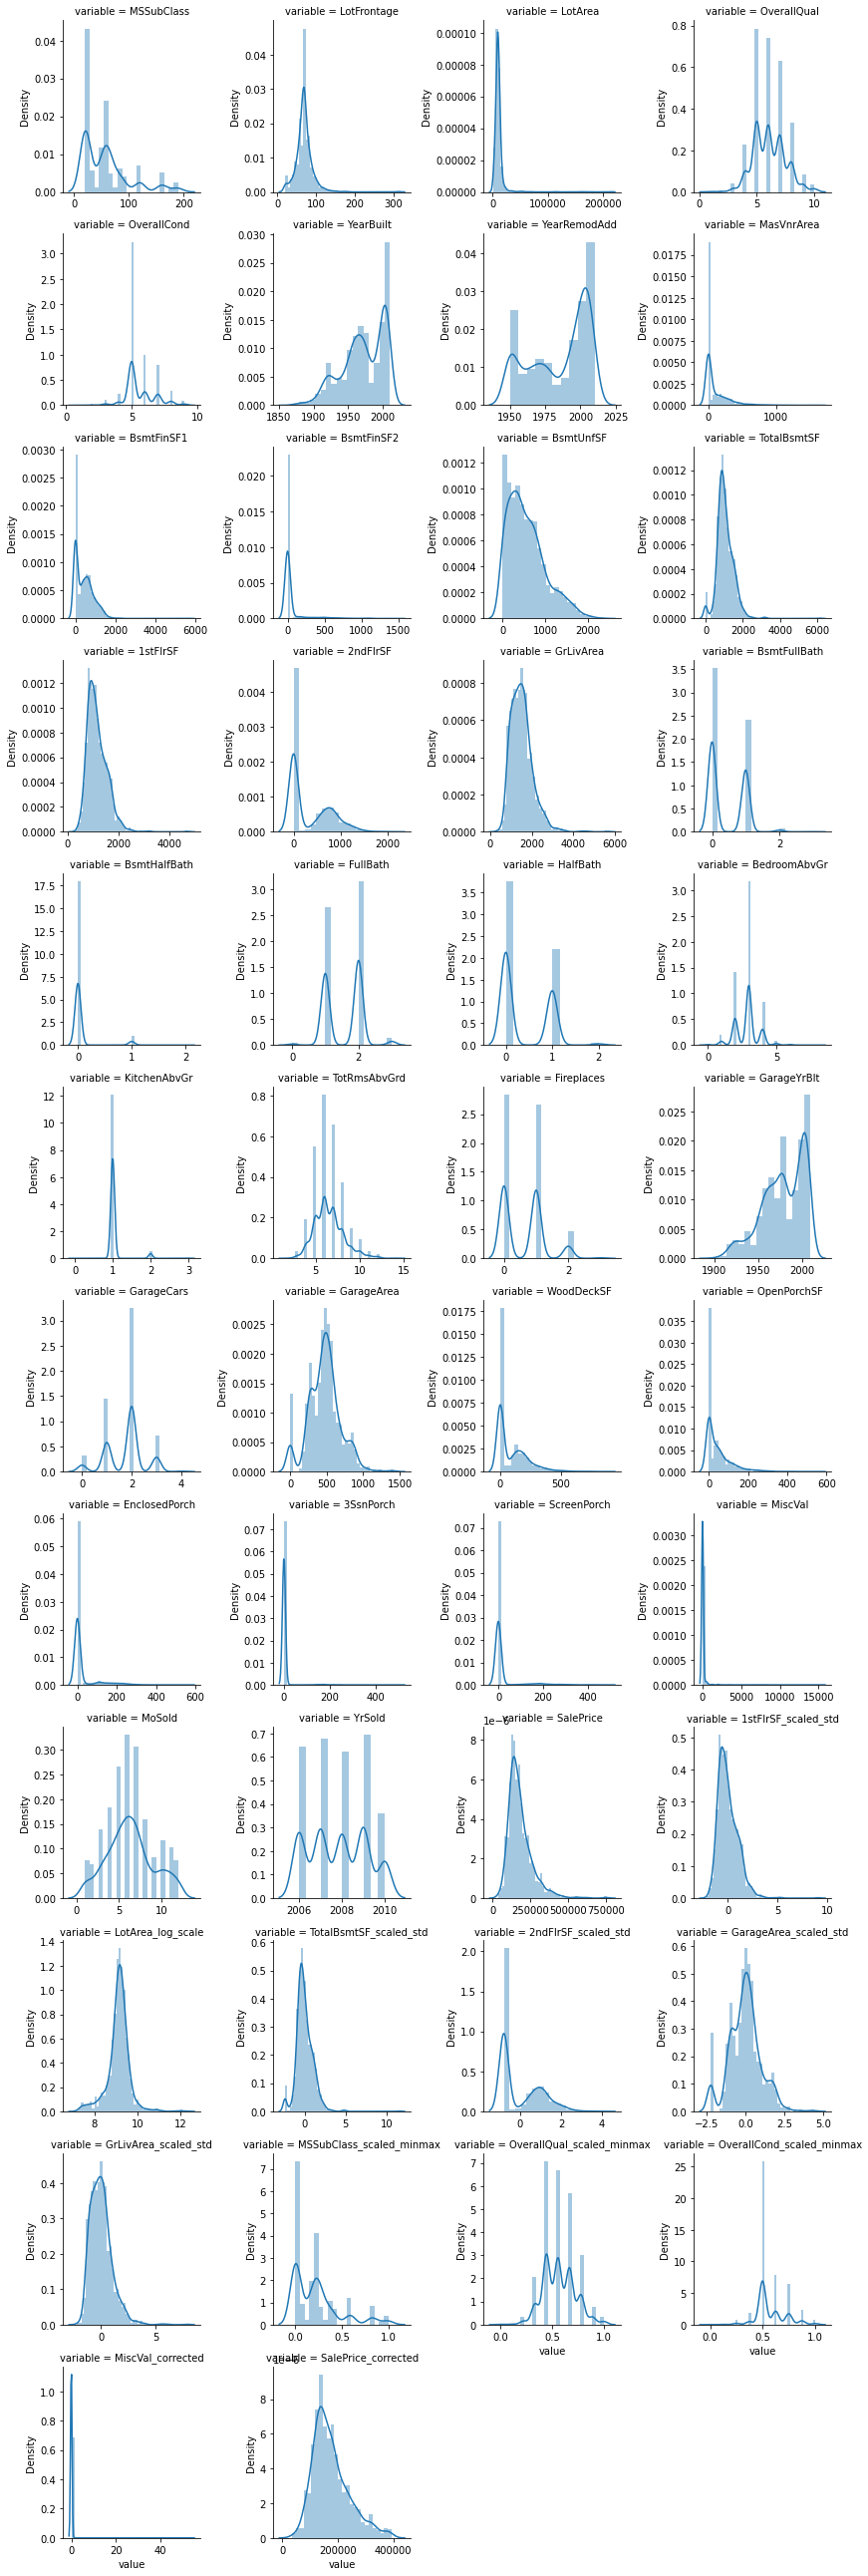

In [ ]:
# Distplot semua kolom numerik, untuk mengetahui distribusi data setelah dilakukan cleansing

f = pd.melt(numerical_df, value_vars=numerical_df.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

Displot kolom 'MiscVal_corrected' ternyata tidak memberikan informasi yang berguna walaupun sudah coba untuk dihapus nilai outlier, maka kolom 'MiscVal' dan 'MiscVal_corrected' lebih baik dihapus saja.

In [ ]:
# Menghapus kolom 'MiscVal' dan 'MiscVal_corrected'

numerical_df = numerical_df.drop(['MiscVal', 'MiscVal_corrected'], axis=1)

In [ ]:
numerical_df.reset_index(inplace=True)

Sekarang beralih ke eksplorasi tabel **categorical_df**.

In [ ]:
categorical_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,2,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,2,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,2,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,2,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,2,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,2,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,2,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,3,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,2,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [ ]:
# Cek semua nama kolom di tabel categorical_df

categorical_df.columns.values

array(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], dtype=object)

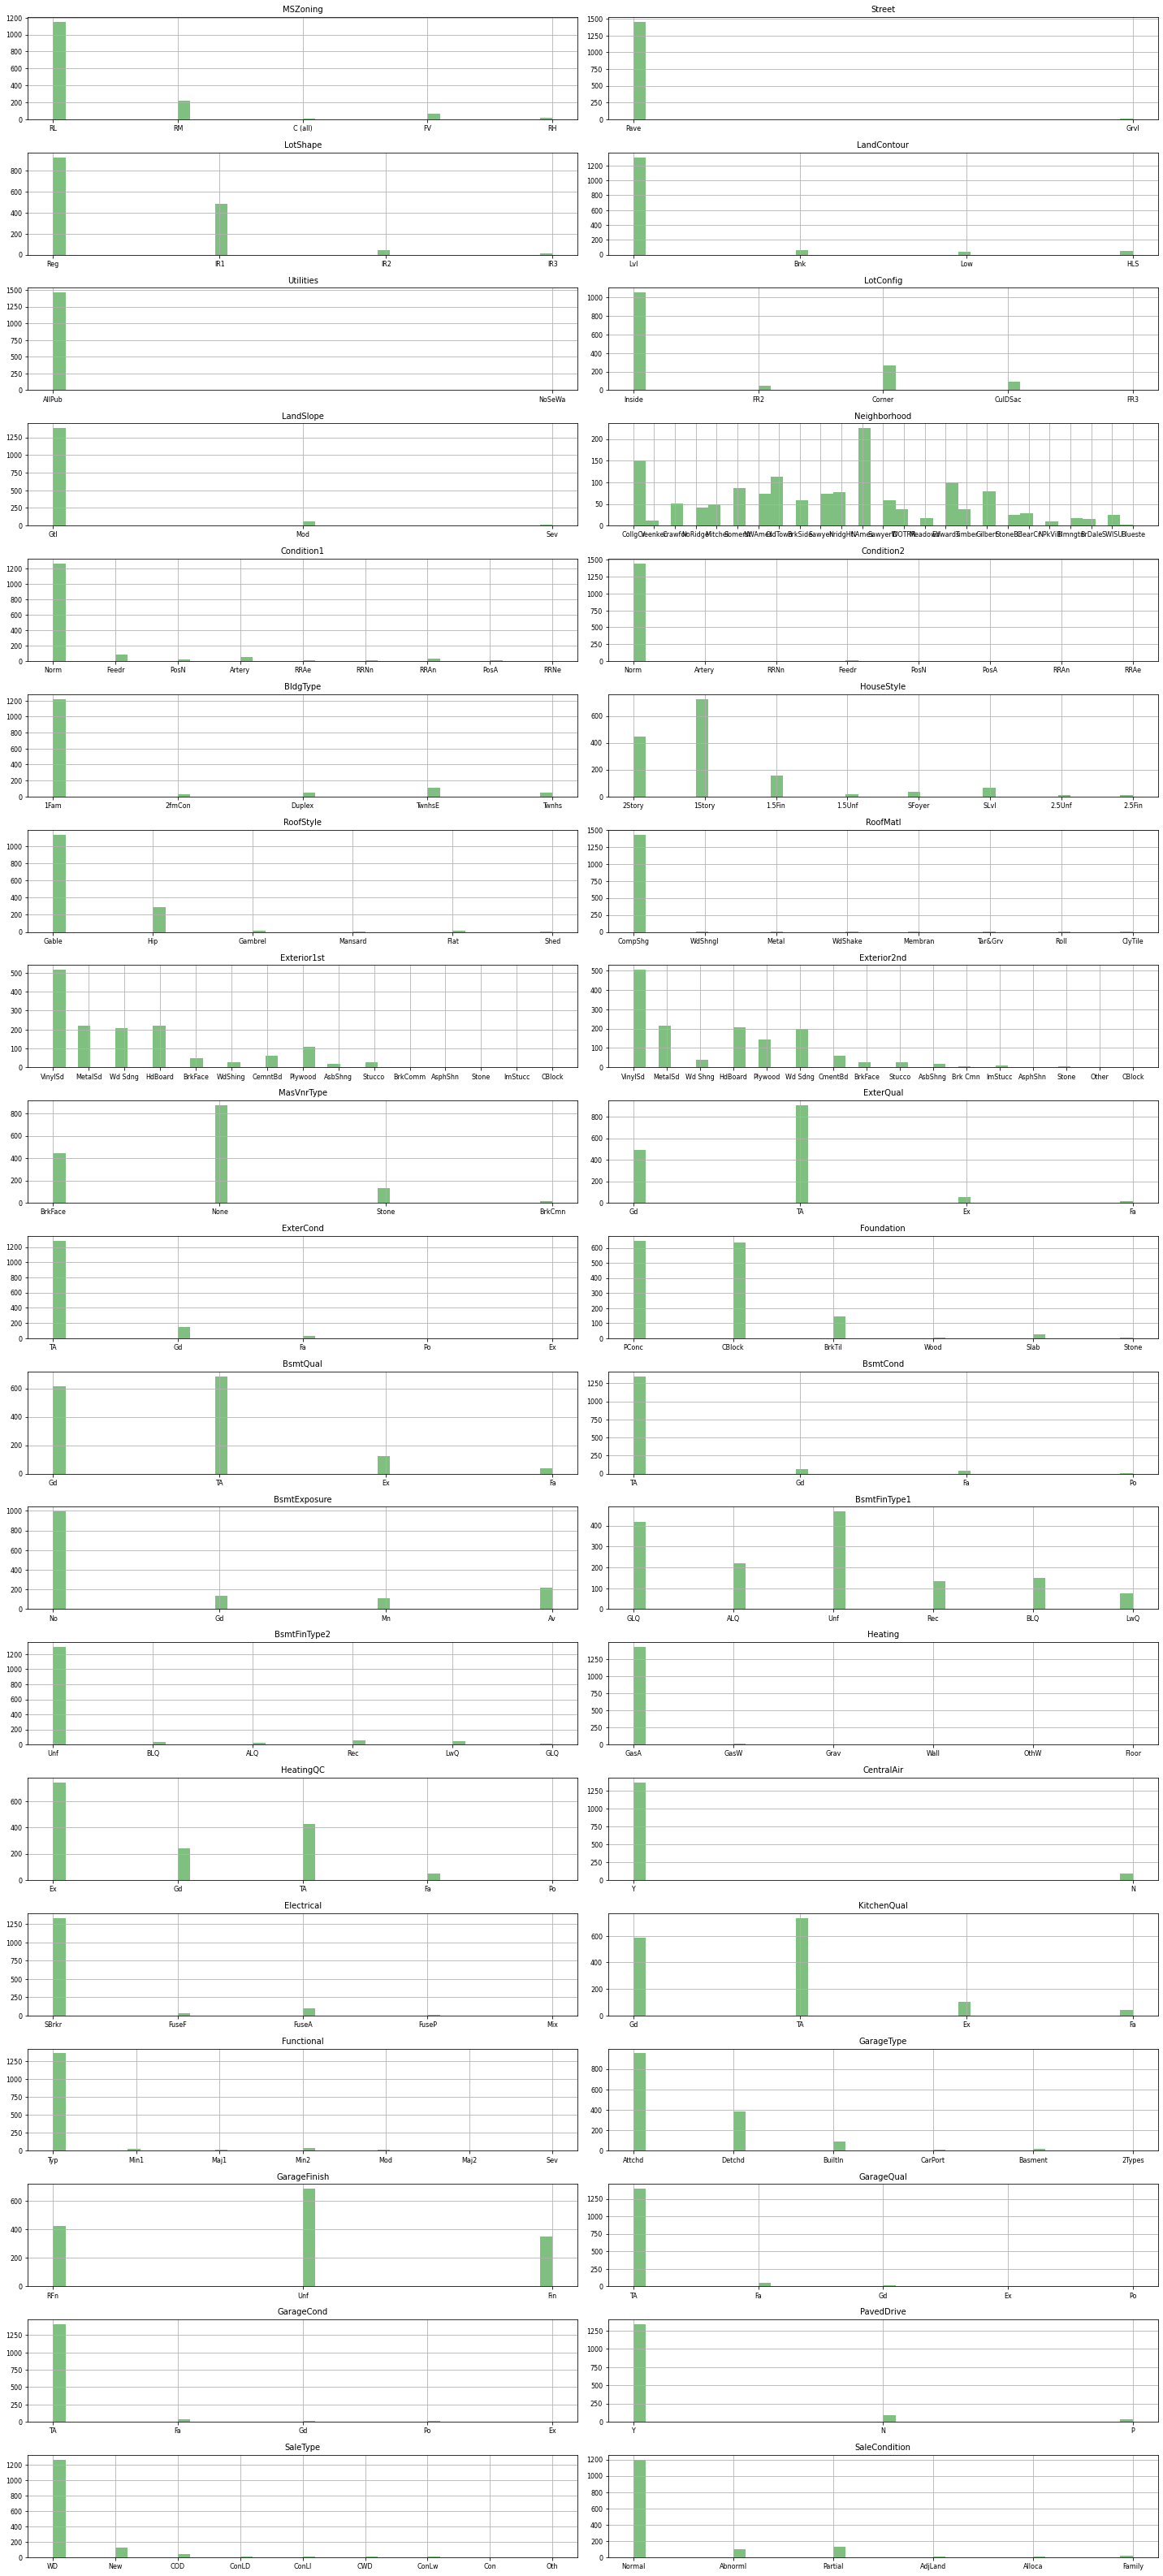

In [ ]:
# Untuk mengetahui distribusi data dari categorical_df

from collections import Counter

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        try:
            df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (20, 48))
        except:
            cnt = Counter(df[var_name])
            cnt.hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (20, 48))
        ax.set_title(var_name, fontsize = 10)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 8)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()

draw_histograms(df, categorical_df, 19, 2)

Mengganti nilai pada kolom ordinal dengan integer.

In [ ]:
Ordinal_dict = {'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
categorical_df.replace({'ExterQual':Ordinal_dict, 'ExterCond':Ordinal_dict,'BsmtQual':Ordinal_dict, 'BsmtCond':Ordinal_dict, 
                        'HeatingQC':Ordinal_dict, 'KitchenQual':Ordinal_dict, 'GarageQual':Ordinal_dict, 'GarageCond':Ordinal_dict}, 
                       inplace=True)

In [ ]:
# Pengecekan nilai unik pada semua kolom ordinal

print("nilai unik pada kolom 'ExterQual' adalah:", sorted(categorical_df['ExterQual'].unique()))
print("nilai unik pada kolom 'ExterCond' adalah:", sorted(categorical_df['ExterCond'].unique()))
print("nilai unik pada kolom 'BsmtQual' adalah:", sorted(categorical_df['BsmtQual'].unique()))
print("nilai unik pada kolom 'BsmtCond' adalah:", sorted(categorical_df['BsmtCond'].unique()))
print("nilai unik pada kolom 'HeatingQC' adalah:", sorted(categorical_df['HeatingQC'].unique()))
print("nilai unik pada kolom 'KitchenQual' adalah:", sorted(categorical_df['KitchenQual'].unique()))
print("nilai unik pada kolom 'GarageQual' adalah:", sorted(categorical_df['GarageQual'].unique()))
print("nilai unik pada kolom 'GarageCond' adalah:", sorted(categorical_df['GarageCond'].unique()))

nilai unik pada kolom 'ExterQual' adalah: [1, 2, 3, 4]
nilai unik pada kolom 'ExterCond' adalah: [0, 1, 2, 3, 4]
nilai unik pada kolom 'BsmtQual' adalah: [1, 2, 3, 4]
nilai unik pada kolom 'BsmtCond' adalah: [0, 1, 2, 3]
nilai unik pada kolom 'HeatingQC' adalah: [0, 1, 2, 3, 4]
nilai unik pada kolom 'KitchenQual' adalah: [1, 2, 3, 4]
nilai unik pada kolom 'GarageQual' adalah: [0, 1, 2, 3, 4]
nilai unik pada kolom 'GarageCond' adalah: [0, 1, 2, 3, 4]


Penggabungan data menjadi satu tabel.

In [ ]:
df_cleansed = pd.concat([numerical_df, categorical_df], axis=1)
df_cleansed.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SalePrice,1stFlrSF_scaled_std,LotArea_log_scale,TotalBsmtSF_scaled_std,2ndFlrSF_scaled_std,GarageArea_scaled_std,...,OverallCond_scaled_minmax,SalePrice_corrected,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,2,2008,208500,-0.793434,9.041922,-0.459303,1.161852,0.351000,...,0.500,208500.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,3,2,PConc,3,2,No,GLQ,Unf,GasA,4,Y,SBrkr,3,Typ,Attchd,RFn,2,2,Y,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,5,2007,181500,0.257140,9.169518,0.466465,-0.795163,-0.060731,...,0.875,181500.0,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,2,2,CBlock,3,2,Gd,ALQ,Unf,GasA,4,Y,SBrkr,2,Typ,Attchd,RFn,2,2,Y,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,9,2008,223500,-0.627826,9.328123,-0.313369,1.189351,0.631726,...,0.500,223500.0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,3,2,PConc,3,2,Mn,GLQ,Unf,GasA,4,Y,SBrkr,3,Typ,Attchd,RFn,2,2,Y,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,2,2006,140000,-0.521734,9.164296,-0.687324,0.937276,0.790804,...,0.500,140000.0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,2,2,BrkTil,2,3,No,ALQ,Unf,GasA,3,Y,SBrkr,3,Typ,Detchd,Unf,2,2,Y,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,12,2008,250000,-0.045611,9.565214,0.199680,1.617877,1.698485,...,0.500,250000.0,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,3,2,PConc,3,2,Av,GLQ,Unf,GasA,4,Y,SBrkr,3,Typ,Attchd,RFn,2,2,Y,WD,Normal


In [ ]:
# Lampirkan link file bonus 2 disini